<a href="https://colab.research.google.com/github/mahmoudhaney/FaceRecognition/blob/main/FaceRecognitionModel/ShortModel_ANN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#load faces and labels
pictures=np.load("/content/Data/olivetti_faces.npy")
labels=np.load("/content/Data/olivetti_faces_target.npy")

In [ ]:
# print the shape for pictures and labels
print("Pictures :",pictures.shape)
print("Pictures :",labels.shape)

Pictures : (400, 64, 64)
Pictures : (400,)


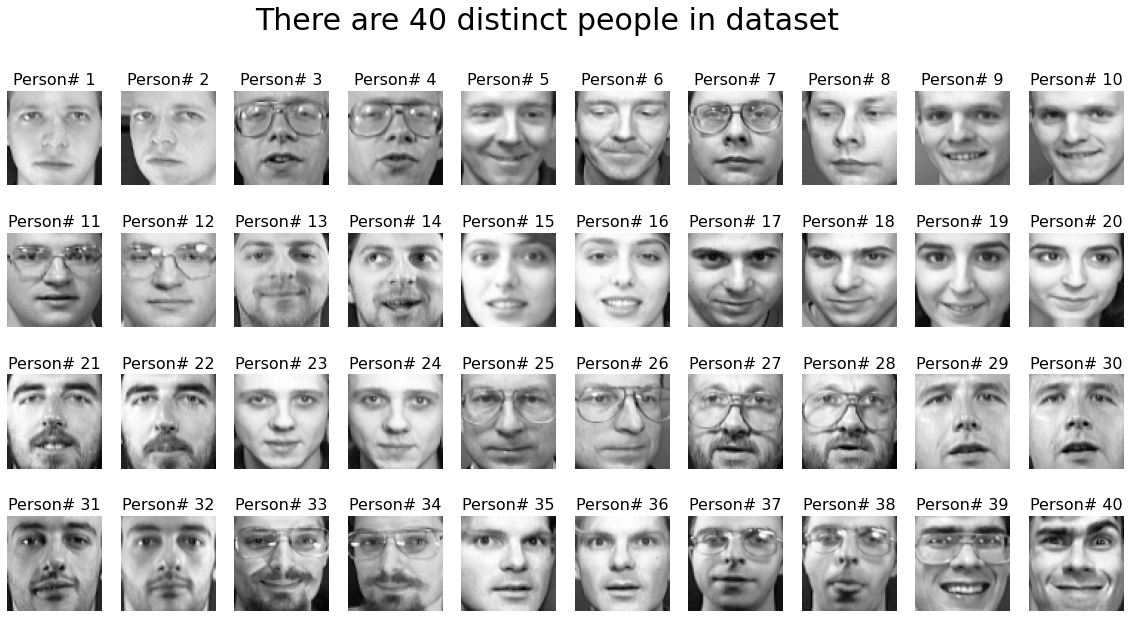

In [ ]:
#show distinct data from dataset
figure=plt.figure(figsize=(20,10))
col=10
row=4
for i in range(1,col*row+1):
  image=pictures[5*(i-1),:,:]
  figure.add_subplot(row,col,i)
  plt.imshow(image,cmap=plt.get_cmap('gray'))
  plt.title("Person# {}".format(i),fontsize=16)
  plt.axis('off')

plt.suptitle("There are 40 distinct people in dataset",fontsize=30)
plt.show()

In [ ]:
#store images in Xpics and store labels in Ylabs
Xpics=pictures
Ylabs=labels.reshape(-1,1)

Spliting data into training dataset and testing dataset



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xpics,Ylabs,test_size=0.2,random_state=46)
print('Training x data:',x_train.shape)
print('Testing x data:',x_test.shape)
print('Training y data:',y_train.shape)
print('Testing y data:',y_test.shape)




Training x data: (320, 64, 64)
Testing x data: (80, 64, 64)
Training y data: (320, 1)
Testing y data: (80, 1)


Reshape the training data and testing data

In [ ]:
x_train=x_train.reshape(-1,64,64,1)
x_test=x_test.reshape(-1,64,64,1)

print("Training x data after reshaping",x_train.shape)
print("Testing x data after reshaping",x_test.shape)

Training x data after reshaping (320, 64, 64, 1)
Testing x data after reshaping (80, 64, 64, 1)


#Building Artificial Neural Network (ANN)




In [ ]:
#check nuique vlaues in y_train and y_test
print(np.unique(y_train))
print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  3  4  5  7  8 10 11 12 13 14 15 17 18 19 20 21 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
#setting up the layers of neural network
from keras.layers.serialization import activation
import keras
from keras.models import Sequential
from keras.layers import Dense
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,1)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(40,activation='sigmoid'),
    keras.layers.Dense(40,activation='sigmoid'),
    
])

In [ ]:
#compile the model with ANN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [ ]:
#training the neural network with data

historic=model.fit(x_train,y_train,epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 3.8008 - accuracy: 0.0250
Epoch 2/150
10/10 [==============================] - 0s 6ms/step - loss: 3.7314 - accuracy: 0.0219
Epoch 3/150
10/10 [==============================] - 0s 5ms/step - loss: 3.7064 - accuracy: 0.0250
Epoch 4/150
10/10 [==============================] - 0s 5ms/step - loss: 3.6944 - accuracy: 0.0281
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 3.6672 - accuracy: 0.0531
Epoch 6/150
10/10 [==============================] - 0s 5ms/step - loss: 3.6488 - accuracy: 0.0750
Epoch 7/150
10/10 [==============================] - 0s 5ms/step - loss: 3.6309 - accuracy: 0.0938
Epoch 8/150
10/10 [==============================] - 0s 5ms/step - loss: 3.6143 - accuracy: 0.0844
Epoch 9/150
10/10 [==============================] - 0s 6ms/step - loss: 3.6035 - accuracy: 0.0656
Epoch 10/150
10/10 [==============================] - 0s 6ms/step - loss: 3.5795 - accuracy: 0.0562
Epoch 11/

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy*100)

3/3 [==============================] - 0s 4ms/step - loss: 0.5524 - accuracy: 0.9250
92.5000011920929


**CNN**

In [ ]:
from keras.utils.np_utils import to_categorical

y_train_ = to_categorical(y_train, num_classes = 40) # 40 distinct people
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)


In [ ]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 37
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5, 
        zoom_range = 0.05,  
        width_shift_range=0,  
        height_shift_range=0, 
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )

Epoch 1/37


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
<ipython-input-14-8bc8c5f5d576>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


16/16 - 9s - loss: 4.0926 - accuracy: 0.0250 - val_loss: 3.6931 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 9s/epoch - 543ms/step
Epoch 2/37


16/16 - 7s - loss: 3.6936 - accuracy: 0.0188 - val_loss: 3.6926 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 7s/epoch - 455ms/step
Epoch 3/37


16/16 - 7s - loss: 3.6938 - accuracy: 0.0156 - val_loss: 3.6912 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 7s/epoch - 459ms/step
Epoch 4/37


16/16 - 7s - loss: 3.7086 - accuracy: 0.0344 - val_loss: 3.6875 - val_accuracy: 0.0250 - lr: 0.0010 - 7s/epoch - 457ms/step
Epoch 5/37


16/16 - 7s - loss: 3.6613 - accuracy: 0.0625 - val_loss: 3.6722 - val_accuracy: 0.0250 - lr: 0.0010 - 7s/epoch - 456ms/step
Epoch 6/37


16/16 - 7s - loss: 3.6680 - accuracy: 0.0906 - val_loss: 3.5629 - val_accuracy: 0.1375 - lr: 0.0010 - 7s/epoch - 457ms/step
Epoch 7/37


16/16 - 7s - loss: 3.4629 - accuracy: 0.1250 - val_loss: 3.2440 - val_accuracy: 0.1625 - lr: 0.0010 - 7s/epoch - 461ms/step
Epoch 8/37


16/16 - 9s - loss: 2.9355 - accuracy: 0.2313 - val_loss: 2.5832 - val_accuracy: 0.3250 - lr: 0.0010 - 9s/epoch - 541ms/step
Epoch 9/37


16/16 - 7s - loss: 2.4759 - accuracy: 0.3344 - val_loss: 1.8663 - val_accuracy: 0.6375 - lr: 0.0010 - 7s/epoch - 457ms/step
Epoch 10/37


16/16 - 7s - loss: 1.9193 - accuracy: 0.4625 - val_loss: 1.1942 - val_accuracy: 0.7000 - lr: 0.0010 - 7s/epoch - 460ms/step
Epoch 11/37


16/16 - 7s - loss: 1.4353 - accuracy: 0.5906 - val_loss: 0.8668 - val_accuracy: 0.8375 - lr: 0.0010 - 7s/epoch - 459ms/step
Epoch 12/37


16/16 - 7s - loss: 1.2313 - accuracy: 0.6375 - val_loss: 0.8829 - val_accuracy: 0.7625 - lr: 0.0010 - 7s/epoch - 458ms/step
Epoch 13/37


16/16 - 7s - loss: 0.9673 - accuracy: 0.7031 - val_loss: 0.5157 - val_accuracy: 0.8500 - lr: 0.0010 - 7s/epoch - 455ms/step
Epoch 14/37


16/16 - 7s - loss: 0.6424 - accuracy: 0.8094 - val_loss: 0.3604 - val_accuracy: 0.8875 - lr: 0.0010 - 7s/epoch - 459ms/step
Epoch 15/37


16/16 - 8s - loss: 0.5872 - accuracy: 0.8250 - val_loss: 0.2549 - val_accuracy: 0.9250 - lr: 0.0010 - 8s/epoch - 470ms/step
Epoch 16/37


16/16 - 9s - loss: 0.5229 - accuracy: 0.8531 - val_loss: 0.2126 - val_accuracy: 0.9625 - lr: 0.0010 - 9s/epoch - 540ms/step
Epoch 17/37


16/16 - 7s - loss: 0.5240 - accuracy: 0.8313 - val_loss: 0.3054 - val_accuracy: 0.9500 - lr: 0.0010 - 7s/epoch - 460ms/step
Epoch 18/37


16/16 - 7s - loss: 0.3936 - accuracy: 0.8969 - val_loss: 0.2217 - val_accuracy: 0.9125 - lr: 0.0010 - 7s/epoch - 463ms/step
Epoch 19/37


16/16 - 7s - loss: 0.3605 - accuracy: 0.8844 - val_loss: 0.2735 - val_accuracy: 0.9250 - lr: 0.0010 - 7s/epoch - 462ms/step
Epoch 20/37


16/16 - 7s - loss: 0.4115 - accuracy: 0.8719 - val_loss: 0.2009 - val_accuracy: 0.9375 - lr: 0.0010 - 7s/epoch - 463ms/step
Epoch 21/37


16/16 - 7s - loss: 0.2611 - accuracy: 0.9125 - val_loss: 0.1329 - val_accuracy: 0.9625 - lr: 0.0010 - 7s/epoch - 460ms/step
Epoch 22/37


16/16 - 7s - loss: 0.2689 - accuracy: 0.9156 - val_loss: 0.2829 - val_accuracy: 0.9125 - lr: 0.0010 - 7s/epoch - 459ms/step
Epoch 23/37


16/16 - 7s - loss: 0.2198 - accuracy: 0.9250 - val_loss: 0.1960 - val_accuracy: 0.9125 - lr: 0.0010 - 7s/epoch - 460ms/step
Epoch 24/37


16/16 - 7s - loss: 0.2130 - accuracy: 0.9156 - val_loss: 0.1515 - val_accuracy: 0.9500 - lr: 0.0010 - 7s/epoch - 458ms/step
Epoch 25/37


16/16 - 7s - loss: 0.3116 - accuracy: 0.9031 - val_loss: 0.1534 - val_accuracy: 0.9125 - lr: 0.0010 - 7s/epoch - 457ms/step
Epoch 26/37


16/16 - 9s - loss: 0.1968 - accuracy: 0.9281 - val_loss: 0.1903 - val_accuracy: 0.9375 - lr: 0.0010 - 9s/epoch - 555ms/step
Epoch 27/37


16/16 - 7s - loss: 0.1394 - accuracy: 0.9563 - val_loss: 0.0879 - val_accuracy: 0.9750 - lr: 0.0010 - 7s/epoch - 458ms/step
Epoch 28/37


16/16 - 7s - loss: 0.1100 - accuracy: 0.9625 - val_loss: 0.0743 - val_accuracy: 0.9625 - lr: 0.0010 - 7s/epoch - 458ms/step
Epoch 29/37


16/16 - 7s - loss: 0.1995 - accuracy: 0.9438 - val_loss: 0.0809 - val_accuracy: 0.9875 - lr: 0.0010 - 7s/epoch - 458ms/step
Epoch 30/37


16/16 - 7s - loss: 0.1107 - accuracy: 0.9531 - val_loss: 0.0660 - val_accuracy: 0.9875 - lr: 0.0010 - 7s/epoch - 463ms/step
Epoch 31/37


16/16 - 7s - loss: 0.2939 - accuracy: 0.9375 - val_loss: 0.0954 - val_accuracy: 0.9750 - lr: 0.0010 - 7s/epoch - 460ms/step
Epoch 32/37


16/16 - 7s - loss: 0.0622 - accuracy: 0.9781 - val_loss: 0.0772 - val_accuracy: 0.9750 - lr: 0.0010 - 7s/epoch - 460ms/step
Epoch 33/37


16/16 - 7s - loss: 0.1700 - accuracy: 0.9375 - val_loss: 0.1335 - val_accuracy: 0.9500 - lr: 0.0010 - 7s/epoch - 459ms/step
Epoch 34/37


16/16 - 7s - loss: 0.1195 - accuracy: 0.9750 - val_loss: 0.1100 - val_accuracy: 0.9625 - lr: 0.0010 - 7s/epoch - 457ms/step
Epoch 35/37


16/16 - 7s - loss: 0.0968 - accuracy: 0.9625 - val_loss: 0.1212 - val_accuracy: 0.9500 - lr: 0.0010 - 7s/epoch - 455ms/step
Epoch 36/37


16/16 - 7s - loss: 0.1127 - accuracy: 0.9688 - val_loss: 0.0801 - val_accuracy: 0.9625 - lr: 0.0010 - 7s/epoch - 458ms/step
Epoch 37/37


16/16 - 7s - loss: 0.1204 - accuracy: 0.9594 - val_loss: 0.0995 - val_accuracy: 0.9750 - lr: 0.0010 - 7s/epoch - 459ms/step


In [ ]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

prediction = model.predict(x_test)
y_test = y_test.reshape(-1,)
diff = y_test - classes_x
diff = diff.reshape(-1,1)

true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(100*true/len(diff),2)

print("Cnn_accuracy is %", Cnn_accuracy)

3/3 [==============================] - 0s 120ms/step
Cnn_accuracy is % 97.5


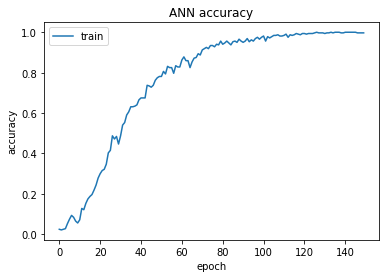

In [ ]:
plt.plot(historic.history['accuracy'])
#plt.plot(histoic.history['val_accuracy'])
plt.title('ANN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

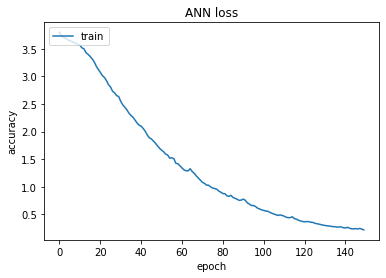

In [ ]:
plt.plot(historic.history['loss'])
#plt.plot(historic.history['val_loss'])
plt.title('ANN loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

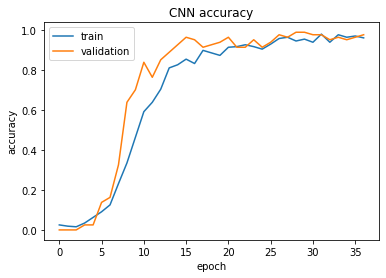

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

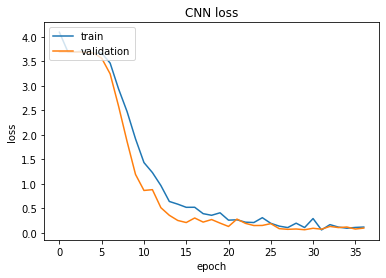

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()